# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<span style="color:blue"> ##### Problem 1: # Marketing Campaigns</span><BR>
The dataset encompasses information from 17 distinct phone campaigns conducted over the span of May 2008 to November 2010, totaling 79,354 contacts. These campaigns involved promoting an appealing long-term deposit application with favorable interest rates. Each contact entry in the dataset includes numerous attributes, alongside an indication of success or failure. Across the entirety of the database, there were 6,499 instances of success, translating to an 8% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [45]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [47]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [49]:
#select the first 7 features
select_7_features = ['age', 'job', 'marital', 'education', 'default', 'housing','loan','y']
d7 = df[select_7_features].copy()
d7.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [50]:
#encode and tranform:
label_encoders = {}
for column in ["job", "marital", "education", "default", "housing","loan", "y"]:
    label_encoders[column] = LabelEncoder()
    d7[column] = label_encoders[column].fit_transform(df[column])

In [51]:
d7.head()

,age,job,marital,education,default,housing,loan,y
0,56,3,1,0,0,0,0,0
1,57,7,1,3,1,0,0,0
2,37,7,1,3,0,2,0,0
3,40,0,1,1,0,0,0,0
4,56,7,1,3,0,0,2,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [52]:
#split data to features and target variables
X = d7.drop(columns=["y"])
y = d7["y"]

In [53]:
#tain and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [54]:
#subscription distribution
sub_distr = d7['y'].value_counts(normalize=True)

# baseline accuracy
maj_distr = sub_distr.idxmax()
baseline_accuracy = sub_distr[maj_distr]

print("Majority of subscription distribution:", maj_distr)
print("                    Baseline accuracy:", baseline_accuracy)

Majority of subscription distribution: 0
                    Baseline accuracy: 0.8873458288821987


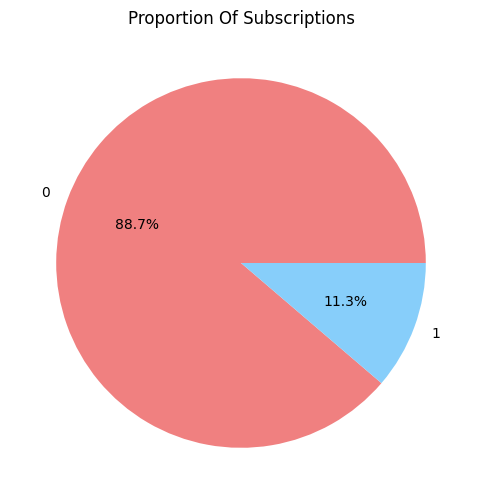

In [55]:
plt.figure(figsize=(6, 6))
plt.pie(sub_distr, labels=sub_distr.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion Of Subscriptions')
plt.show()

##### <span style="color:blue">Observation of target variable</span>
This dataset seems to be skewed, which could impact the perforamnce of the models

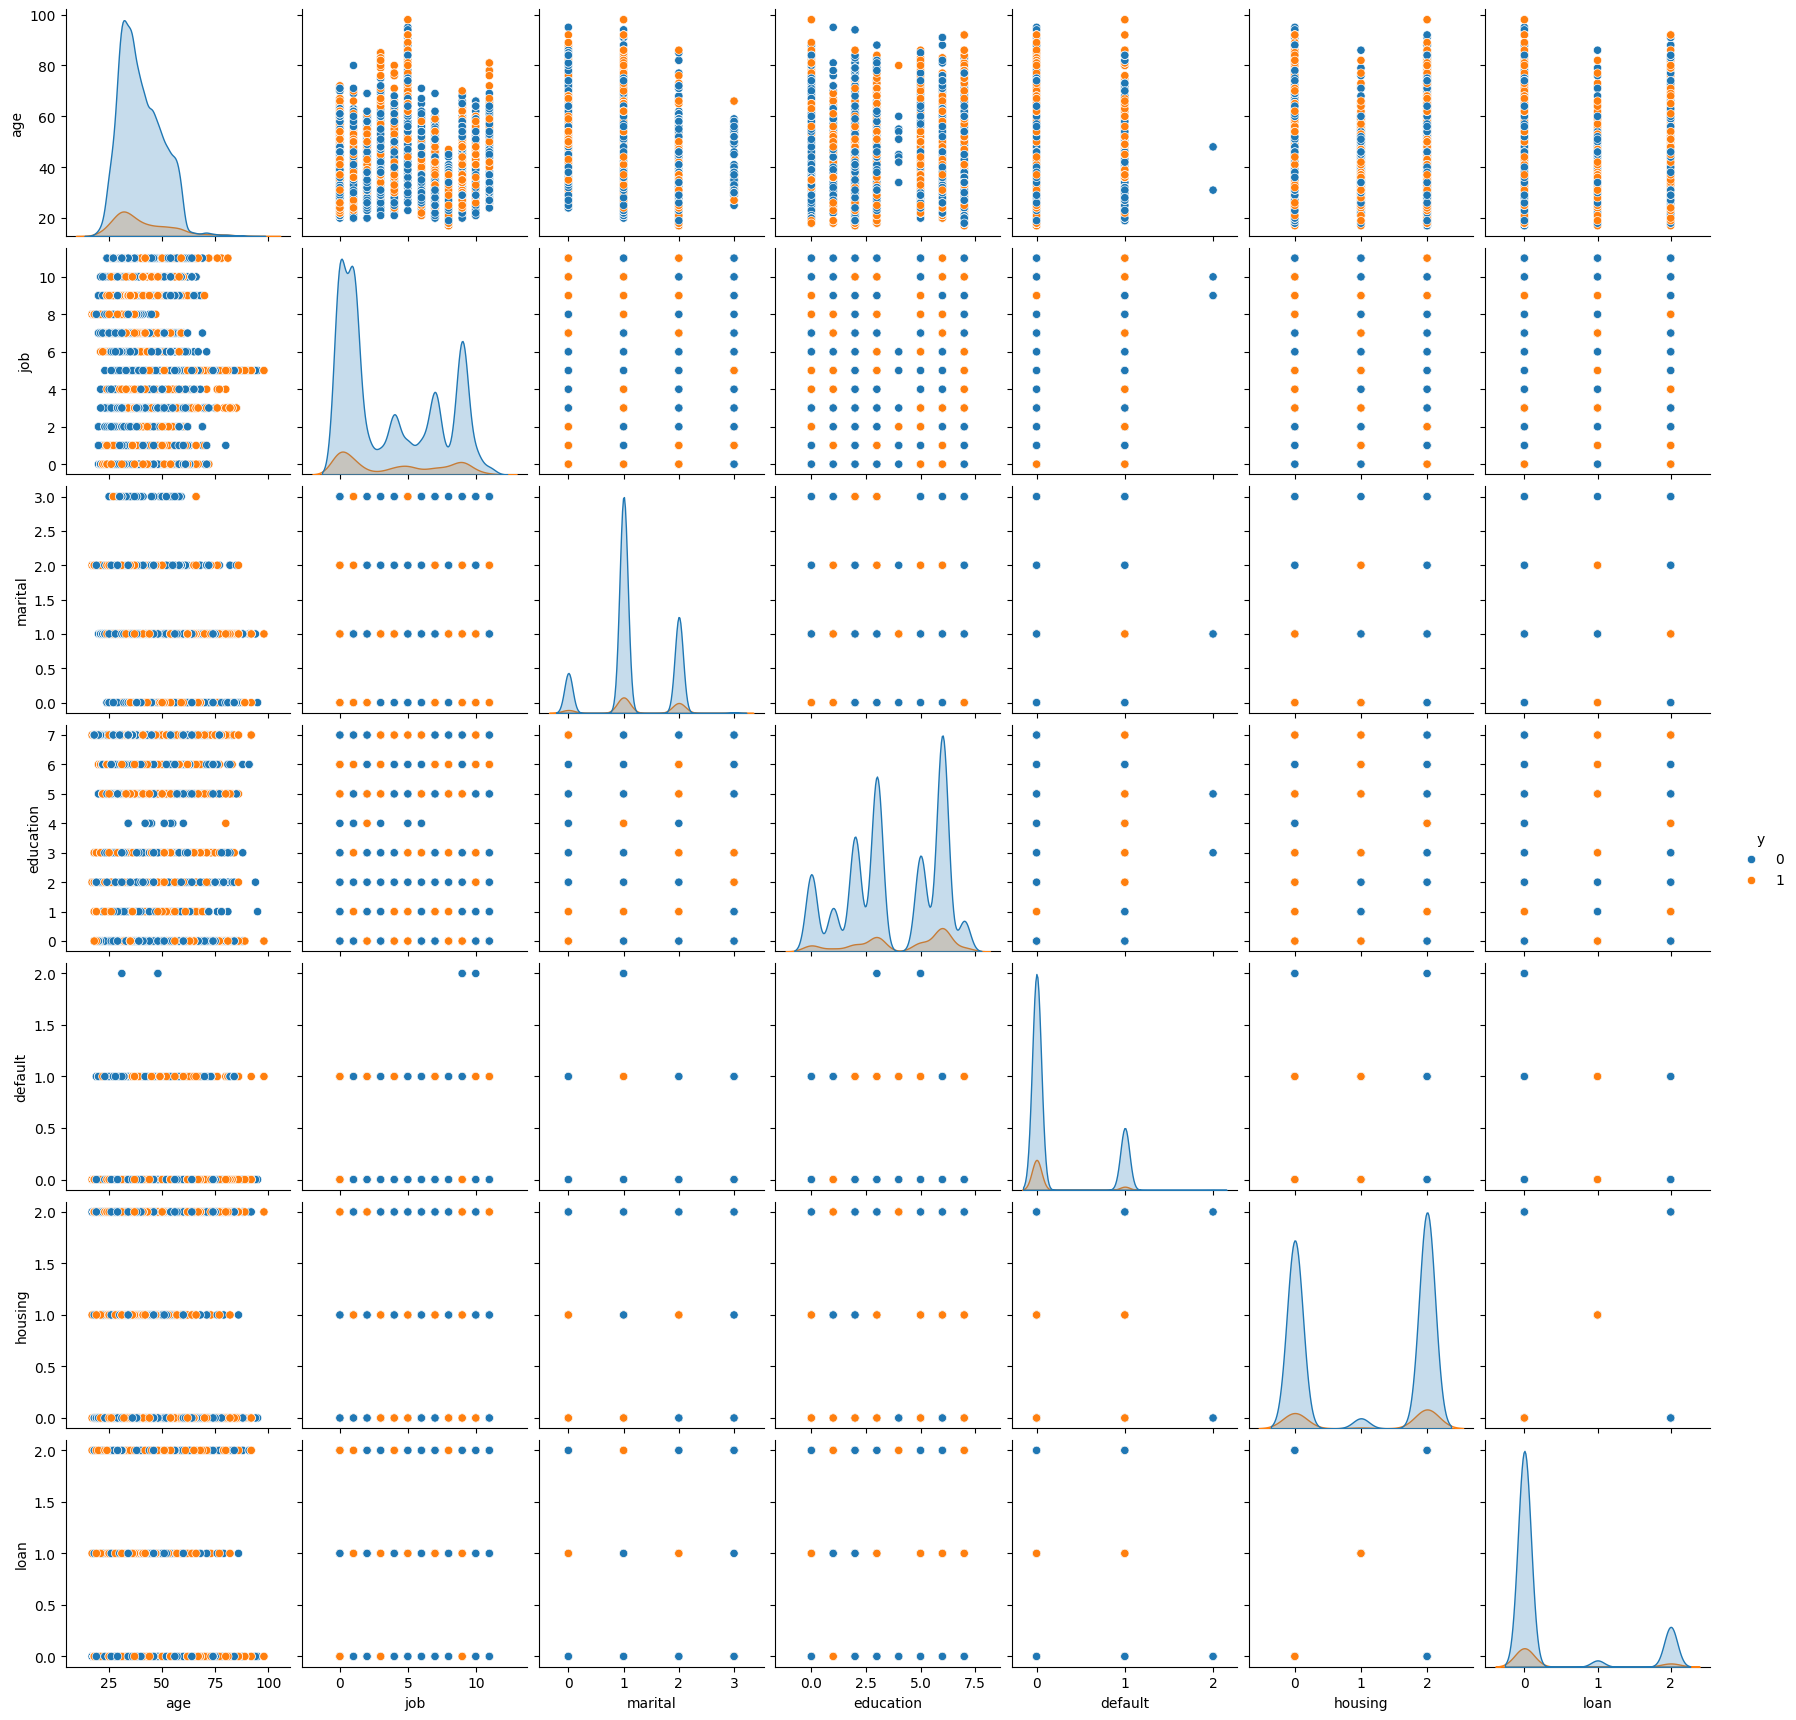

In [56]:
import seaborn as sns
sns.pairplot(data = d7, hue = 'y')

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

#  accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8865015780529255


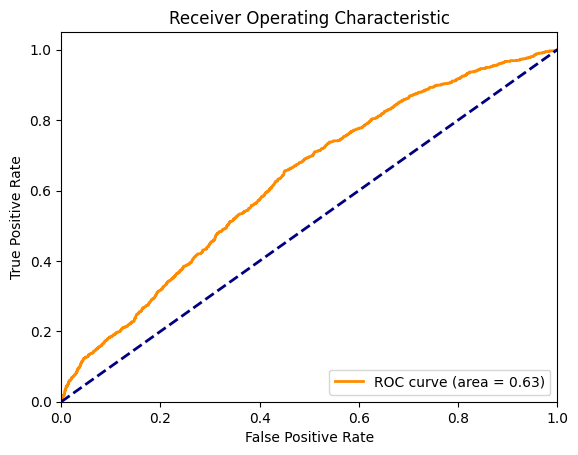

In [58]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)


roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' \
         % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

#  store results
results = {'Model': [], 'Train Time': [], 'Train Accuracy': [],
           'Test Accuracy': []}

#  evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    results['Model'].append(name)
    results['Train Time'].append(train_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)






In [60]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.271767,0.887557,0.886502
1,KNN,0.081274,0.890167,0.872056
2,Decision Tree,0.063573,0.916601,0.862831
3,SVM,13.587568,0.887557,0.886502


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### <span style="color:blue"> should we keep the gender feature? Why or why not? </span>
Based on the article, there did not seem to be any significant in the result and outcome between males and females. so adding gender should not change the outcome.


In [61]:
# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

# Initialize and train the decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# Feature importances for logistic regression
logistic_reg_feature_importances = abs(logistic_reg_model.coef_[0])

# Feature importances for decision tree
decision_tree_feature_importances = decision_tree_model.feature_importances_

# Create DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,  # Assuming X contains column names
    'Logistic Regression Importance': logistic_reg_feature_importances,
    'Decision Tree Importance': decision_tree_feature_importances
})

# Sort DataFrame by importance for better visualization
feature_importances_df = feature_importances_df.sort_values(by='Logistic Regression Importance', ascending=False)

print(feature_importances_df)

     Feature  Logistic Regression Importance  Decision Tree Importance
4    default                        0.985836                  0.022513
2    marital                        0.314664                  0.108321
3  education                        0.060821                  0.141155
5    housing                        0.027005                  0.109690
0        age                        0.021363                  0.375952
1        job                        0.014927                  0.165868
6       loan                        0.008692                  0.076501


##### <span style="color:blue"> Feature importance </span>
what seems to be interesting is that feature importance is very different between the 2 models
- DT: the most important feature is age vs default for LR
- Then Education is the 2nd important in DT vs matrital status in LR

In [63]:
# Let's buil different parameters for each of the models
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
param_grid_dt = {'max_depth': [None, 3, 5, 7, 9,13]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# which grids use for each model
param_grids = {
    'Logistic Regression': param_grid_lr,
    'KNN': param_grid_knn,
    'Decision Tree': param_grid_dt
}

In [71]:
#  results
results = {'Model': [], 'Best Parameters': [], 'Train Time': [], 'Train Accuracy': [],
           'Test Accuracy': [], 'ROC-AUC Score': []}


In [72]:
from sklearn.metrics import roc_auc_score
for name, model in models.items():
    start_time = time.time()

    # GridSearch cross validation
    grid_search = GridSearchCV(model, param_grids[name], cv=5)
    grid_search.fit(X_train, y_train)

    train_time = time.time() - start_time
    train_accuracy = grid_search.best_score_
    test_accuracy = grid_search.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

    results['Model'].append(name)
    results['Best Parameters'].append(grid_search.best_params_)
    results['Train Time'].append(train_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['ROC-AUC Score'].append(roc_auc)

In [73]:
results_df = pd.DataFrame(results)

In [74]:
results_df

,Model,Best Parameters,Train Time,Train Accuracy,Test Accuracy,ROC-AUC Score
0,Logistic Regression,{'C': 0.001},8.498609,0.887557,0.886502,0.612323
1,KNN,{'n_neighbors': 11},12.629356,0.885888,0.883467,0.588263
2,Decision Tree,{'max_depth': 3},1.110544,0.887557,0.886137,0.614082


**ROC score seems to be lower than the base model, But accuracy seems to be close to the base model**

In [ ]:
# now checking SVC, Looks like this taking lots of time so I am trying to seperate to
#see if I can get results, it is possible that SVM not a good model for this scenario
#as you saw earlier above, with default paameters, this took 100 times slower than other models
# also looking at SNS Pair graphs, none of the features appeat to be seperable, so perhaps
#this is adding additional complexity to run this using other hyper parameters.
#waited 40 mminsisn for this to complete, so at this point, I aborted using additional
#hyper parameters for SVM

svm_start_time = time.time()
svm_grid_search = GridSearchCV(SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}, cv=5)
svm_grid_search.fit(X_train, y_train)
svm_train_time = time.time() - svm_start_time

svm_best_params = svm_grid_search.best_params_
svm_train_accuracy = accuracy_score(y_train, svm_grid_search.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svm_grid_search.predict(X_test))

# append SVM results
results['Model'].append('SVM')
results['Best Params'].append(svm_best_params)
results['Train Time'].append(svm_train_time)
results['Train Accuracy'].append(svm_train_accuracy)
results['Test Accuracy'].append(svm_test_accuracy)


In [75]:
max_depth = decision_tree_model.get_depth()

print("Maximum Depth of Decision Tree:", max_depth)

Maximum Depth of Decision Tree: 27


In [77]:
#we got the best max_depth from the previous runand using it here.
#the maximum tree size is 27
decision_tree_model = DecisionTreeClassifier(max_depth=3)
d7['y_label'] = d7['y'].map({0: 'no', 1: 'yes'})
#created and using y_label yes, no for decision tree
y = d7["y_label"]
d7.head()

,age,job,marital,education,default,housing,loan,y,y_label
0,56,3,1,0,0,0,0,0,no
1,57,7,1,3,1,0,0,0,no
2,37,7,1,3,0,2,0,0,no
3,40,0,1,1,0,0,0,0,no
4,56,7,1,3,0,0,2,0,no


In [78]:
decision_tree_model.fit(X, y)


DecisionTreeClassifier(max_depth=3)

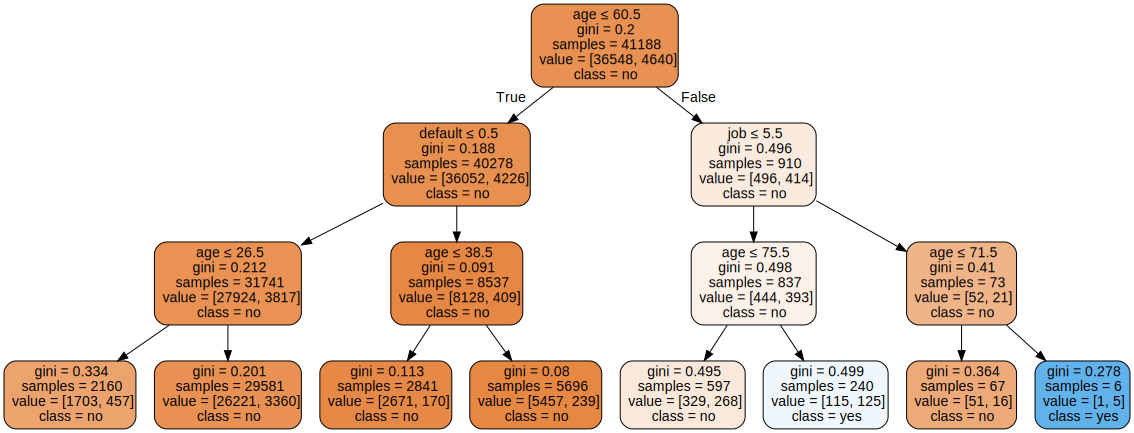

In [79]:
decision_tree_model.fit(X, y)

dot_data = export_graphviz(decision_tree_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['no', 'yes'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_depth_3")
graph

##### Questions